# MPB Demo for 18.369

Here, we demonstrate running [MPB](https://mpb.readthedocs.io/en/latest/) for the MIT course [18.369](http://math.mit.edu/~stevenj/18.369/).  MPB computes dispersion
relations (band structures) $\omega(\vec{k})$ for arbitrary periodic dielectric structures,
from photonic crystals to optical fibers and other dielectric waveguides.

This is an [IPython notebook](https://ipython.readthedocs.io/en/stable/), which provides a nice
browser-based [Jupyter](http://jupyter.org/) interface to the [Python language](https://www.python.org/).  The notebook allows us to combine code and results in one place.

Here, we are using the (relatively new) Python interface to MPB, which is installed when you install [Meep](https://meep.readthedocs.io/en/latest/) (our free/open-source time-domain Maxwell simulation package) along with MPB.   The recommended way to install this software is to use [the Anaconda Python packages](https://meep.readthedocs.io/en/latest/Installation/#conda-packages) for Linux or MacOS.  On Windows, you can install the [Linux package via WSL](https://meep.readthedocs.io/en/latest/Installation/#installation-on-windows).

In [1]:
# do inline plots with Python's matplotlib library
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# load the Meep and MPB modules in Python
import meep as mp
from meep import mpb

## 2d dielectric waveguide

Our first example computes the dispersion relation and eigenfunctions of a width $h=1$ waveguide of $\varepsilon=12$ in air.

In [3]:
# First, we will define some parameters describing our structure.  
# Defining them symbolically here makes it easier to change them.

eps_hi = 12  # the waveguide dielectric constant
eps_lo = 1  # the surrounding low-dielectric material
h = 1       # the thickness of the waveguide (arbitrary units)
Y = 10      # the size of the computational cell in the y direction

#### Define the structure and the computational cell:

In [4]:
# Here we define the size of the computational cell.  Since it is 2d,
# it has no-size in the z direction.  Because it is a waveguide in the
# x direction, then the eigenproblem at a given k has no-size in the
# x direction as well.
geometry_lattice = mp.Lattice(size=(0, Y))

# the default-material is what fills space where we haven't placed objects
default_material=mp.Medium(epsilon=eps_lo)

# a list of geometric objects to create structures in our computation:
# (in this case, we only have one object, a block to make the waveguide)
geometry = [mp.Block(center=(0,0),
                     size=(mp.inf,1,mp.inf),
                     material=mp.Medium(epsilon=eps_hi))]

# MPB discretizes space with a given resolution.   Here, we set
# a resolution of 32 pixels per unit distance.  Thus, with Y=10
# our comptuational cell will be 320 pixels wide.  In general,
# you should make the resolution fine enough so that the pixels
# are much smaller than the wavelength of the light.
resolution = 32

#### Tell MPB what eigenmodes we want to compute:

In [5]:
# Generally, we want omega(k) for a range of k values.  MPB
# can automatically interpolate a set of k values between any
# given bounds.  Here, we will interpolate 10 k's between 0 and 2.
kmin = 0
kmax = 2
k_interp = 10
k_points = mp.interpolate(k_interp, [mp.Vector3(kmin), mp.Vector3(kmax)])

In [6]:
# let's look at our k points:
k_points

[Vector3<0.0, 0.0, 0.0>,
 Vector3<0.18181818181818182, 0.0, 0.0>,
 Vector3<0.36363636363636365, 0.0, 0.0>,
 Vector3<0.5454545454545454, 0.0, 0.0>,
 Vector3<0.7272727272727273, 0.0, 0.0>,
 Vector3<0.9090909090909092, 0.0, 0.0>,
 Vector3<1.0909090909090908, 0.0, 0.0>,
 Vector3<1.2727272727272727, 0.0, 0.0>,
 Vector3<1.4545454545454546, 0.0, 0.0>,
 Vector3<1.6363636363636365, 0.0, 0.0>,
 Vector3<1.8181818181818183, 0.0, 0.0>,
 Vector3<2.0, 0.0, 0.0>]

In [7]:
# we also need to specify how many eigenmodes we want to compute:
num_bands = 10

### Putting it all together

The quantities above are passed to MPB by creating a `ModeSolver` object.

(We could have done this directly without assigning them to variables first.)

In [8]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

#### Computing the modes

To compute *all* the modes, we could now simply do `ms.run()`.
However, it is convenient to compute only one symmetry of mode
at a time.  In particular, we will compute only TM (E in z direction)
modes, and separately compute even and odd modes with respect to the
y=0 mirror symmetry plane:

In [9]:
ms.run_tm_yeven()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
12 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.18181818181818182, 0.0, 0.0>
  Vector3<0.36363636363636365, 0.0, 0.0>
  Vector3<0.5454545454545454, 0.0, 0.0>
  Vector3<0.7272727272727273, 0.0, 0.0>
  Vector3<0.9090909090909092, 0.0, 0.0>
  Vector3<1.0909090909090908, 0.0, 0.0>
  Vector3<1.2727272727272727

The 5 bands vs k are available in the `ms.all_freqs` object:

In [10]:
tmyeven_freqs = ms.all_freqs
tmyeven_freqs

array([[0.        , 0.06668429, 0.16440014, 0.25492855, 0.30955458,
        0.39358338, 0.49230213, 0.56764631, 0.62724974, 0.72216721],
       [0.08022325, 0.18973071, 0.24005361, 0.29068499, 0.34346721,
        0.42988459, 0.52039153, 0.5817769 , 0.64781151, 0.74264765],
       [0.13251679, 0.32117627, 0.36816283, 0.40104317, 0.45708607,
        0.52564861, 0.58123007, 0.63076742, 0.71258594, 0.80029841],
       [0.18286521, 0.35795054, 0.54810954, 0.56797436, 0.59410794,
        0.62064201, 0.67318429, 0.73987945, 0.81275043, 0.87150387],
       [0.23307107, 0.39429153, 0.62978987, 0.72940818, 0.74615979,
        0.77808226, 0.82224388, 0.87012676, 0.90229161, 0.95519089],
       [0.2834862 , 0.43233373, 0.6591858 , 0.90657501, 0.91145823,
        0.92581871, 0.95222722, 0.99000277, 1.03770424, 1.0932104 ],
       [0.33416617, 0.47212049, 0.68925155, 0.93770485, 1.09231058,
        1.10341843, 1.12505237, 1.15560103, 1.18703782, 1.21073471],
       [0.38509278, 0.51345589, 0.7209185

Let's do the same thing for the odd-y modes:

In [11]:
ms.run_tm_yodd()
tmyodd_freqs = ms.all_freqs

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tmyodd.
Initializing fields to random numbers...
12 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.18181818181818182, 0.0, 0.0>
  Vector3<0.36363636363636365, 0.0, 0.0>
  Vector3<0.5454545454545454, 0.0, 0.0>
  Vector3<0.7272727272727273, 0.0, 0.0>
  Vector3<0.9090909090909092, 0.0, 0.0>
  Vector3<1.0909090909090908, 0.0, 0.0>
  Vector3<1.2727272727272727, 0.0, 0.0>
  Vector3<

#### Plotting the results

To plot the results vs. $k_x$, let's first extract a list of the $k_x$ components from the `k_points`:

In [12]:
kx = [k.x for k in ms.k_points]

(0, 2)

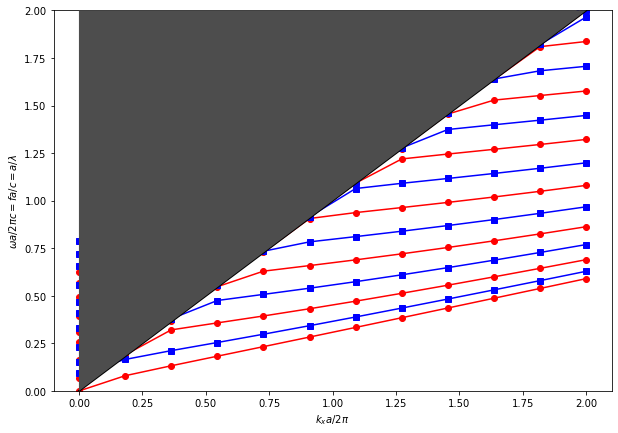

In [13]:
plt.figure(figsize=(10,7))
plt.plot(kx, tmyeven_freqs, "ro-")
plt.plot(kx, tmyodd_freqs, "bs-")
plt.plot(kx, kx, "k-", linewidth=2)
plt.fill([0,2,0],[0,2,2], facecolor=(0.3,0.3,0.3), zorder=3)
plt.xlabel("$k_x a / 2\pi$")
plt.ylabel("$\omega a / 2\pi c = fa/c = a/\lambda$")
plt.ylim(0,2)

Next, we'll do the same thing for the modes that are odd with respect to $y=0$, plotting these as blue squares.

### Plotting the fields

MPB can also output the electric and magnetic fields of the eigensolutions.  Because these are potentially large 3d arrays, it only does so if you explicitly request them, and outputs the fields in a standard format called an [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file, which ends in `.h5`.  A single HDF5 file can contain multiple "datasets", e.g. multiple field components or real+imaginary parts.

In `2dwaveguide.ctl`, we request some field output by a line `(run-tm output-efield-z)` at the end of the file, which performs another computation at the end for a single $k$ point ($k=1$, i.e. $=1\times 2\pi/a$ in MPB's units where $a$ is the arbitrary unit of distance chosen in the `.ctl` file) and outputs $E_z$ for all the bands.

Also, by default, MPB always outputs and HDF5 file containing $\varepsilon$.  It is a good idea to check this file (plot $\varepsilon$) to make sure the structure is what you think it is.  We can use the `h5ls` command-line tool to see what is inside this file:

In [14]:
eps = ms.get_epsilon()

epsilon: 1-12, mean 2.1, harm. mean 1.10386, 10.3125% > 1, 10% "fill"


Text(0, 0.5, '$\\epsilon$')

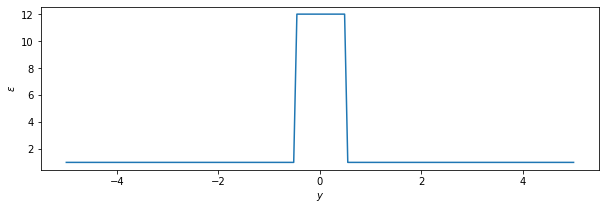

In [15]:
y = np.linspace(-Y/2,Y/2,eps.size)
plt.figure(figsize=(10,3))
plt.plot(y, eps)
plt.xlabel("$y$")
plt.ylabel("$\epsilon$")

As expected, $\varepsilon$ is 12 in the middle and 1 elsewhere.

Now let's run the mode solver at a single k point $k_x = 1$ and plot the fields.  We'll use `run_tm` to compute both y-even and y-odd modes together.

By default, MPB just picks a random phase for the eigenfunctions.  If we pass `mpb.fix_efield_phase` to the `run_tm` function, it picks a deterministic phase that tries to make the electric field as real as possible.

In [16]:
ms.k_points = [mp.Vector3(1)]
ms.run_tm(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<1.0, 0.0, 0.0>
elapsed time for initialization: 0.013293981552124023
solve_kpoint (1,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 27 iterations.
tmfreqs:, 1, 1, 0, 0, 1, 0.308793, 0.366015, 0.45202, 0.557191, 0.67404, 0.797606, 0.924094, 1.00156, 1.00591, 1.01393
elapsed time for 

In [17]:
ms.get_efield(1).shape

(320, 1, 1, 3)

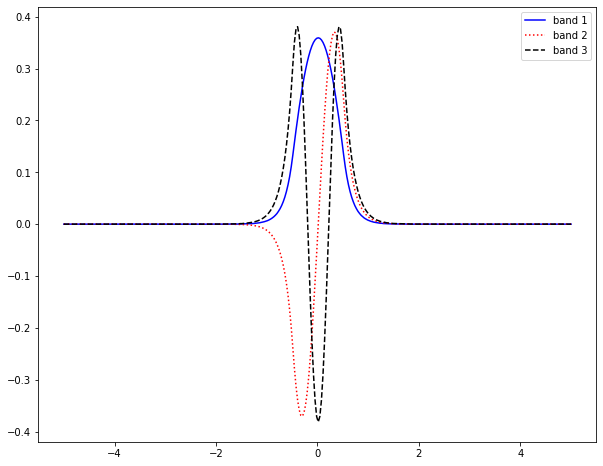

In [18]:
plt.figure(figsize=(10,8))
ez1 = ms.get_efield(1)[:,0,0,2] # the z component of band 1
ez2 = ms.get_efield(2)[:,0,0,2] # the z component of band 2
ez3 = ms.get_efield(3)[:,0,0,2] # the z component of band 2
plt.plot(y, np.real(ez1), "b-")
plt.plot(y, np.real(ez2), "r:")
plt.plot(y, np.real(ez3), "k--")
plt.legend(["band 1", "band 2", "band 3"])

Let's check that they have the expected orthogonality relationship, i.e. $\int \vec{E}_3^* \cdot \varepsilon \vec{E}_1 \approx 0$:

In [19]:
np.dot(ez3, (eps * ez1)) / (np.linalg.norm(ez1) * np.linalg.norm(ez3))

(3.088444338168053e-08+8.208050919240777e-08j)

Yup, the overlap integral is almost zero.

(It's slightly nonzero due to discretization effects — computing the sum with numpy is not the same as the planewave-basis inner product used within MPB.)

## 2d periodic waveguide

Here, we consider a period-$a$ sequence of dielectric ($\varepsilon=12$) rods of radius $0.2a$ in air.

This time, we won't bother to define a bunch of variables first — we will just create a `ModeSolver` object right away.  We'll use the same `eps_hi`, `eps_lo`, and `Y` (supercell size) variables as before.

Note that the `geometry_lattice` variable now has `size=(1,Y)`: we have a period $a=1$ in the $x$ direction:

In [20]:
ms2 = mpb.ModeSolver(
    num_bands=5,
    k_points=mp.interpolate(200, [mp.Vector3(0),mp.Vector3(2)]),
    geometry=[mp.Cylinder(center=(0,0), radius=0.2, material=mp.Medium(epsilon=eps_hi))],
    geometry_lattice=mp.Lattice(size=(1, Y)),
    resolution=16,
    default_material=mp.Medium(epsilon=eps_lo))

ms2.run_tm_yeven()
tmyeven_freqs2 = ms2.all_freqs
ms2.run_tm_yodd()
tmyodd_freqs2 = ms2.all_freqs
kx2 = [k.x for k in ms2.k_points]

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 160 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
202 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.009950248756218905, 0.0, 0.0>
  Vector3<0.01990049751243781, 0.0, 0.0>
  Vector3<0.029850746268656716, 0.0, 0.0>
  Vector3<0.03980099502487562, 0.0, 0.0>
  Vector3<0.04975124378109452, 0.0, 0.0>
  Vector3<0.05970149253731343, 0.0, 0.0>
  Vector3<0.06965174129353234, 0.0, 0.0>

Solving for bands 2 to 5...
Finished solving for bands 2 to 5 after 9 iterations.
tmyevenfreqs:, 1, 0, 0, 0, 0, 0, 0.0883666, 0.179071, 0.272298, 0.366919
elapsed time for k point: 0.056221961975097656
solve_kpoint (0.00995025,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 2, 0.00995025, 0, 0, 0.00995025, 0.00932425, 0.0888054, 0.179302, 0.272458, 0.367039
elapsed time for k point: 0.037203073501586914
solve_kpoint (0.0199005,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 3, 0.0199005, 0, 0, 0.0199005, 0.0186349, 0.0901097, 0.179996, 0.272937, 0.367399
elapsed time for k point: 0.04089975357055664
solve_kpoint (0.0298507,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 4, 0.0298507, 0, 0, 0.0298507, 0.0279176, 0.0922456, 0.181148, 0.273734, 0.367999
elapsed time for k point: 0.0324249267578125
solve_kpoint (0.039801,0,0):


tmyevenfreqs:, 33, 0.318408, 0, 0, 0.318408, 0.221292, 0.322784, 0.354694, 0.407212, 0.462213
elapsed time for k point: 0.04265093803405762
solve_kpoint (0.328358,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 34, 0.328358, 0, 0, 0.328358, 0.22517, 0.332551, 0.363296, 0.413976, 0.464717
elapsed time for k point: 0.04020285606384277
solve_kpoint (0.338308,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 35, 0.338308, 0, 0, 0.338308, 0.228876, 0.342329, 0.37194, 0.420624, 0.466814
elapsed time for k point: 0.0411372184753418
solve_kpoint (0.348259,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 36, 0.348259, 0, 0, 0.348259, 0.232406, 0.352115, 0.38061, 0.42705, 0.4687
elapsed time for k point: 0.041400909423828125
solve_kpoint (0.358209,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tm

tmyevenfreqs:, 66, 0.646766, 0, 0, 0.646766, 0.234103, 0.357011, 0.384947, 0.430136, 0.469649
elapsed time for k point: 0.051027774810791016
solve_kpoint (0.656716,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 67, 0.656716, 0, 0, 0.656716, 0.230664, 0.347221, 0.376273, 0.423873, 0.467768
elapsed time for k point: 0.052340030670166016
solve_kpoint (0.666667,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 68, 0.666667, 0, 0, 0.666667, 0.227045, 0.337438, 0.367613, 0.41732, 0.465807
elapsed time for k point: 0.05138993263244629
solve_kpoint (0.676617,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 69, 0.676617, 0, 0, 0.676617, 0.223253, 0.327666, 0.358989, 0.410603, 0.463525
elapsed time for k point: 0.04902791976928711
solve_kpoint (0.686567,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterati

Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 99, 0.975124, 0, 0, 0.975124, 0.0232807, 0.0910765, 0.180515, 0.273296, 0.367669
elapsed time for k point: 0.030699968338012695
solve_kpoint (0.985075,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 100, 0.985075, 0, 0, 0.985075, 0.0139821, 0.089351, 0.179592, 0.272658, 0.367189
elapsed time for k point: 0.03187394142150879
solve_kpoint (0.995025,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 101, 0.995025, 0, 0, 0.995025, 0.00466297, 0.0884765, 0.179129, 0.272338, 0.366949
elapsed time for k point: 0.03222465515136719
solve_kpoint (1.00498,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 102, 1.00498, 0, 0, 1.00498, 0.00466297, 0.0884765, 0.179129, 0.272338, 0.366949
elapsed time for k point: 0.0313868522644043
solve_kpoint (1.01493,0,0):
Solving for band

Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 132, 1.30348, 0, 0, 1.30348, 0.21516, 0.30816, 0.3419, 0.397003, 0.457522
elapsed time for k point: 0.03994584083557129
solve_kpoint (1.31343,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 133, 1.31343, 0, 0, 1.31343, 0.21929, 0.317906, 0.350413, 0.403811, 0.460778
elapsed time for k point: 0.04105114936828613
solve_kpoint (1.32338,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 134, 1.32338, 0, 0, 1.32338, 0.223253, 0.327666, 0.358989, 0.410604, 0.463527
elapsed time for k point: 0.04332113265991211
solve_kpoint (1.33333,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 135, 1.33333, 0, 0, 1.33333, 0.227045, 0.337438, 0.367613, 0.41732, 0.46581
elapsed time for k point: 0.03978395462036133
solve_kpoint (1.34328,0,0):
Solving for

Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 165, 1.63184, 0, 0, 1.63184, 0.238918, 0.371706, 0.397925, 0.438592, 0.473019
elapsed time for k point: 0.04151177406311035
solve_kpoint (1.64179,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 166, 1.64179, 0, 0, 1.64179, 0.235755, 0.361909, 0.389282, 0.433106, 0.470659
elapsed time for k point: 0.04007077217102051
solve_kpoint (1.65174,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 167, 1.65174, 0, 0, 1.65174, 0.232407, 0.352115, 0.38061, 0.427051, 0.468705
elapsed time for k point: 0.04070901870727539
solve_kpoint (1.66169,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 168, 1.66169, 0, 0, 1.66169, 0.228877, 0.342329, 0.37194, 0.420624, 0.466819
elapsed time for k point: 0.0406038761138916
solve_kpoint (1.67164,0,0):
Solving

Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 198, 1.9602, 0, 0, 1.9602, 0.037157, 0.0951621, 0.182752, 0.274847, 0.368836
elapsed time for k point: 0.04823899269104004
solve_kpoint (1.97015,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 199, 1.97015, 0, 0, 1.97015, 0.0279176, 0.0922456, 0.181148, 0.273734, 0.367999
elapsed time for k point: 0.04003596305847168
solve_kpoint (1.9801,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 200, 1.9801, 0, 0, 1.9801, 0.0186349, 0.0901097, 0.179996, 0.272937, 0.367399
elapsed time for k point: 0.054923057556152344
solve_kpoint (1.99005,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 201, 1.99005, 0, 0, 1.99005, 0.00932425, 0.0888054, 0.179302, 0.272458, 0.367039
elapsed time for k point: 0.05368614196777344
solve_kpoint (2,0,0):
Solving for bands 1 to 5...
Finish

  Vector3<1.4228855721393034, 0.0, 0.0>
  Vector3<1.4328358208955223, 0.0, 0.0>
  Vector3<1.4427860696517412, 0.0, 0.0>
  Vector3<1.4527363184079602, 0.0, 0.0>
  Vector3<1.462686567164179, 0.0, 0.0>
  Vector3<1.472636815920398, 0.0, 0.0>
  Vector3<1.4825870646766168, 0.0, 0.0>
  Vector3<1.4925373134328357, 0.0, 0.0>
  Vector3<1.5024875621890548, 0.0, 0.0>
  Vector3<1.5124378109452736, 0.0, 0.0>
  Vector3<1.5223880597014925, 0.0, 0.0>
  Vector3<1.5323383084577114, 0.0, 0.0>
  Vector3<1.5422885572139302, 0.0, 0.0>
  Vector3<1.5522388059701493, 0.0, 0.0>
  Vector3<1.5621890547263682, 0.0, 0.0>
  Vector3<1.572139303482587, 0.0, 0.0>
  Vector3<1.5820895522388059, 0.0, 0.0>
  Vector3<1.5920398009950247, 0.0, 0.0>
  Vector3<1.6019900497512438, 0.0, 0.0>
  Vector3<1.6119402985074627, 0.0, 0.0>
  Vector3<1.6218905472636815, 0.0, 0.0>
  Vector3<1.6318407960199004, 0.0, 0.0>
  Vector3<1.6417910447761195, 0.0, 0.0>
  Vector3<1.6517412935323383, 0.0, 0.0>
  Vector3<1.6616915422885572, 0.0, 0.0>
  V

tmyoddfreqs:, 24, 0.228856, 0, 0, 0.228856, 0.249574, 0.302981, 0.374057, 0.450708, 0.520134
elapsed time for k point: 0.03699183464050293
solve_kpoint (0.238806,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 25, 0.238806, 0, 0, 0.238806, 0.258713, 0.310498, 0.380031, 0.455246, 0.523091
elapsed time for k point: 0.04111480712890625
solve_kpoint (0.248756,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 26, 0.248756, 0, 0, 0.248756, 0.267908, 0.318142, 0.38615, 0.459886, 0.526099
elapsed time for k point: 0.04276680946350098
solve_kpoint (0.258706,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 27, 0.258706, 0, 0, 0.258706, 0.277154, 0.325905, 0.392403, 0.464613, 0.529155
elapsed time for k point: 0.04071784019470215
solve_kpoint (0.268657,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
t

tmyoddfreqs:, 57, 0.557214, 0, 0, 0.557214, 0.45305, 0.48045, 0.512538, 0.549047, 0.567119
elapsed time for k point: 0.05997514724731445
solve_kpoint (0.567164,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 9 iterations.
tmyoddfreqs:, 58, 0.567164, 0, 0, 0.567164, 0.443467, 0.472283, 0.507719, 0.54448, 0.576346
elapsed time for k point: 0.06188011169433594
solve_kpoint (0.577114,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 11 iterations.
tmyoddfreqs:, 59, 0.577114, 0, 0, 0.577114, 0.433867, 0.46391, 0.502386, 0.540051, 0.585259
elapsed time for k point: 0.07675790786743164
solve_kpoint (0.587065,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 15 iterations.
tmyoddfreqs:, 60, 0.587065, 0, 0, 0.587065, 0.424261, 0.45542, 0.496583, 0.535815, 0.58739
elapsed time for k point: 0.09836220741271973
solve_kpoint (0.597015,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 9 iterations.
tmyo

tmyoddfreqs:, 90, 0.885572, 0, 0, 0.885572, 0.151873, 0.229805, 0.318794, 0.409002, 0.492077
elapsed time for k point: 0.04313182830810547
solve_kpoint (0.895522,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 91, 0.895522, 0, 0, 0.895522, 0.144535, 0.225047, 0.315429, 0.406508, 0.490352
elapsed time for k point: 0.0421450138092041
solve_kpoint (0.905473,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 92, 0.905473, 0, 0, 0.905473, 0.137523, 0.220631, 0.312339, 0.404224, 0.488768
elapsed time for k point: 0.04125189781188965
solve_kpoint (0.915423,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 93, 0.915423, 0, 0, 0.915423, 0.130892, 0.21658, 0.309529, 0.402155, 0.48733
elapsed time for k point: 0.03556203842163086
solve_kpoint (0.925373,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmy

tmyoddfreqs:, 123, 1.21393, 0, 0, 1.21393, 0.235987, 0.291968, 0.365386, 0.444115, 0.515809
elapsed time for k point: 0.04348182678222656
solve_kpoint (1.22388,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 124, 1.22388, 0, 0, 1.22388, 0.245028, 0.299274, 0.371126, 0.44848, 0.518677
elapsed time for k point: 0.04102134704589844
solve_kpoint (1.23383,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 125, 1.23383, 0, 0, 1.23383, 0.254136, 0.306723, 0.377025, 0.452964, 0.521606
elapsed time for k point: 0.044245004653930664
solve_kpoint (1.24378,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 126, 1.24378, 0, 0, 1.24378, 0.263304, 0.314305, 0.383073, 0.457555, 0.524589
elapsed time for k point: 0.04246687889099121
solve_kpoint (1.25373,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfr

tmyoddfreqs:, 156, 1.54229, 0, 0, 1.54229, 0.467355, 0.491955, 0.518924, 0.550745, 0.558824
elapsed time for k point: 0.059857845306396484
solve_kpoint (1.55224,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 9 iterations.
tmyoddfreqs:, 157, 1.55224, 0, 0, 1.55224, 0.457831, 0.484413, 0.514764, 0.551187, 0.562742
elapsed time for k point: 0.05353903770446777
solve_kpoint (1.56219,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 9 iterations.
tmyoddfreqs:, 158, 1.56219, 0, 0, 1.56219, 0.448261, 0.4764, 0.510193, 0.546762, 0.571707
elapsed time for k point: 0.05332016944885254
solve_kpoint (1.57214,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 9 iterations.
tmyoddfreqs:, 159, 1.57214, 0, 0, 1.57214, 0.438668, 0.468116, 0.505115, 0.54224, 0.580939
elapsed time for k point: 0.05467987060546875
solve_kpoint (1.58209,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 12 iterations.
tmyoddfre

tmyoddfreqs:, 189, 1.87065, 0, 0, 1.87065, 0.163399, 0.237541, 0.324332, 0.413123, 0.494919
elapsed time for k point: 0.044296979904174805
solve_kpoint (1.8806,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 190, 1.8806, 0, 0, 1.8806, 0.155651, 0.232307, 0.320575, 0.410325, 0.492991
elapsed time for k point: 0.0430450439453125
solve_kpoint (1.89055,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 191, 1.89055, 0, 0, 1.89055, 0.148166, 0.227385, 0.317078, 0.407729, 0.491197
elapsed time for k point: 0.04401516914367676
solve_kpoint (1.9005,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 192, 1.9005, 0, 0, 1.9005, 0.140985, 0.222795, 0.313849, 0.40534, 0.489542
elapsed time for k point: 0.04083514213562012
solve_kpoint (1.91045,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 1

It's always a good idea to read in $\varepsilon$ and plot it as a check, using the `pcolor` function to plot a colormap and `axis("equal")` to use equal scales for the horizontal and vertical axes:

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


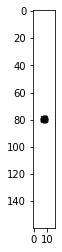

In [21]:
plt.imshow(ms2.get_epsilon().T, cmap='binary')

This looks right!  It is often nice to plot multiple periods of the unit cell, and MPB provides a type called `MPBData` that can perform such post-processing.  Let's plot 21 periods in the `x` direction and upsample to a higher `resolution`).

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


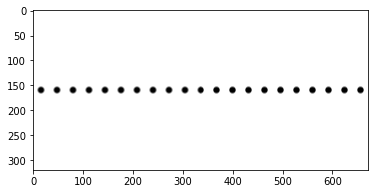

In [22]:
md = mpb.MPBData(x=21, resolution=32)
plt.imshow(md.convert(ms2.get_epsilon()).T, cmap='binary')

Now that $\varepsilon$ looks good, let's plot the band diagrams.  Normally, we would only compute the band diagram in the first Brillouin zone, or its subset the irreducible Brillouin zone, but for illustration purposes here we compute a couple of unit cells in $k$ to show the periodicity of the band diagram.  As before, we'll use `fill_between` to plot the light cone (which is also periodic) on top.

(0, 0.6)

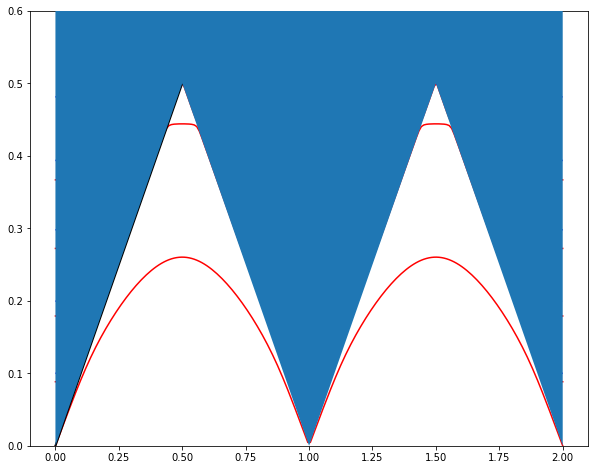

In [23]:
plt.figure(figsize=(10,8))
plt.plot(kx2, tmyeven_freqs2, "r-")
plt.plot(kx2, tmyodd_freqs2, "b--")
plt.plot(kx2, kx2, "k-", linewidth=2)
plt.fill_between([0,0.5,1,1.5,2.0],[0,0.5,0,0.5,0],[1,1,1,1,1], zorder=3)
plt.ylim(0,0.6)

In this case, there are only even-symmetry TM guided bands, and for much of the Brillouin zone there is only a single guided band.  (You will show in homework that at least one guided band is guaranteed analytically in structures such as this.)

Now let's plot the field computed at $k=0.4 \times 2\pi/a$:

In [24]:
ms2.k_points = [mp.Vector3(0.4)]
ms2.run_tm_yeven(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 160 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
1 k-points
  Vector3<0.4, 0.0, 0.0>
elapsed time for initialization: 0.020581960678100586
solve_kpoint (0.4,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 11 iterations.
tmyevenfreqs:, 1, 0.4, 0, 0, 0.4, 0.247719, 0.403026, 0.424431, 0.451077, 0.486499
elapsed time for k point: 0.09296107292175293
Fixing e-field (band 

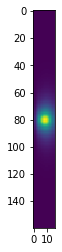

In [25]:
plt.imshow(np.imag(ms2.get_efield(1)[:,:,0,2]).T, cmap="viridis")

Unfortunately, it's a little hard to make sense of the field if you only look at a single unit cell.  It is a lot clearer if you plot multiple unit cells, multiplying the field by $\exp(i k a)$ as you go from one unit cell to the next.

We'll use our `md = MPBData(...)` object from above to plot multiple periods in the $x$ direction.   The `MPBData` object also "knows" to multiply by the Bloch phase factor $\exp(ika)$ for each successive unit cell.

We'll also be a little more careful to center the colormap on zero, using `np.max(abs(ez))` to compute the maximum absolute value of the data and then the `vmin/vmax` options to `imshow` to set the edges of the colormap.  That way, with the `RdBu` colormap, red=negative, blue=positive, and white is zero.

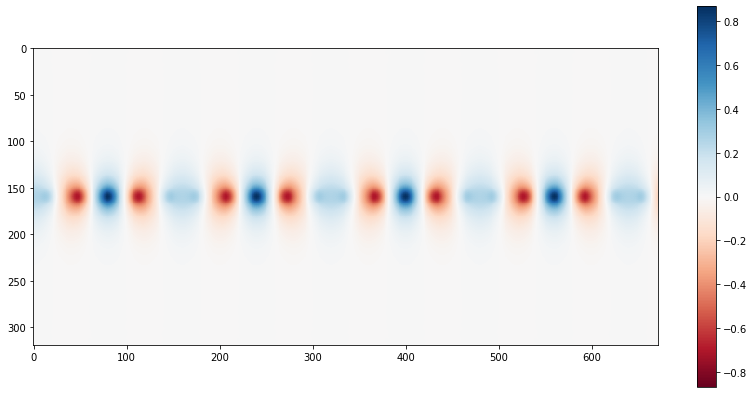

In [26]:
ez = np.real(md.convert(ms2.get_efield(1)[:,:,0,2]))
maxabs = np.max(abs(ez))
plt.figure(figsize=(14,7))
plt.imshow(ez.T, cmap='RdBu', vmin=-maxabs, vmax=+maxabs)
plt.colorbar()

Now we can see more easily that the fields are oscillating within the waveguide and are exponentially decaying outside the waveguide: a guided mode!

(This kind of guided mode, in periodic dielectric waveguides, is discussed in more detail by [chapter 7 of the textbook](http://ab-initio.mit.edu/book/photonic-crystals-book.pdf).)